#Install Required Libraries

In [ ]:
!pip install scikit-learn matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs


# Generate Sample Data

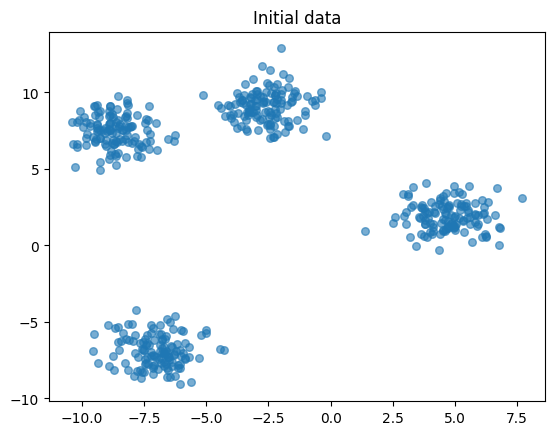

In [ ]:
# Create data with 4 clusters
X, y = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

plt.scatter(X[:, 0], X[:, 1], s=30, alpha=0.6)
plt.title("Initial data")
plt.show()


# Elbow Method

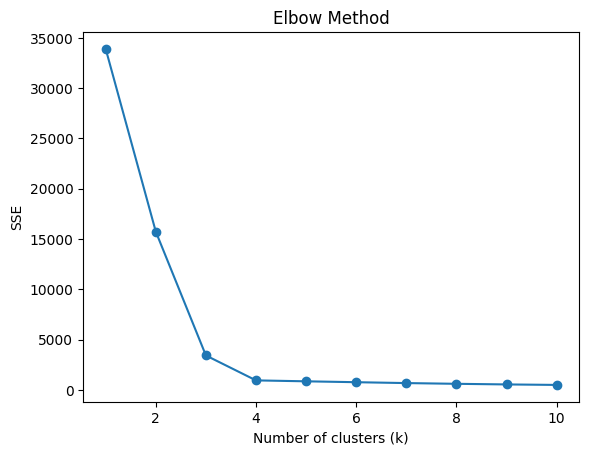

In [ ]:
sse = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)  # Sum of squared errors (SSE)

# Draw Elbow Chart
plt.plot(k_values, sse, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.show()


# Silhouette Score Method

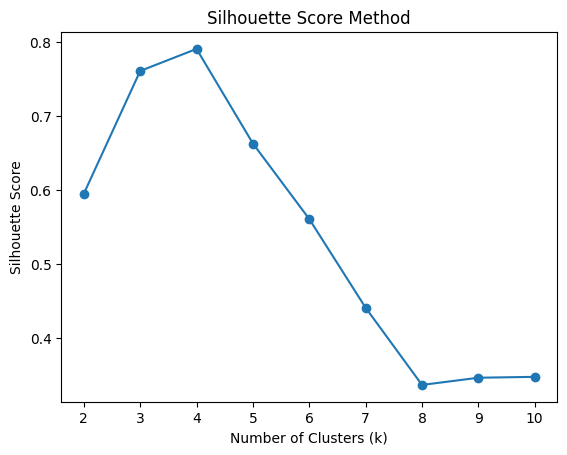

In [ ]:
silhouette_scores = []

for k in range(2, 11):  # Silhouette Score requires at least k=2
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# Plot the Silhouette Score graph
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Method")
plt.show()


# Gap Statistics Method

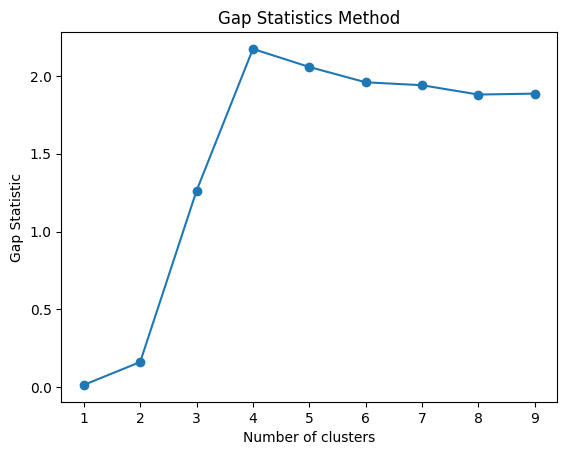

In [ ]:
def gap_statistic(X, n_refs=10, max_k=10):
    gaps = np.zeros(max_k - 1)
    sse_refs = np.zeros((n_refs, max_k - 1))

    for k in range(1, max_k):
        # Applying K-Means to Data
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        sse_real = kmeans.inertia_

        # Generate random data in the same value domain
        for i in range(n_refs):
            X_random = np.random.uniform(X.min(axis=0), X.max(axis=0), X.shape)
            kmeans.fit(X_random)
            sse_refs[i, k - 1] = kmeans.inertia_

        # Caculate Gap Statistic
        gap = np.mean(np.log(sse_refs[:, k - 1])) - np.log(sse_real)
        gaps[k - 1] = gap

    return gaps

# Run Gap Statistics
gaps = gap_statistic(X, n_refs=10, max_k=10)

# Draw Gap Statistics
plt.plot(range(1, 10), gaps, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Gap Statistic")
plt.title("Gap Statistics Method")
plt.show()


# DBSCAN

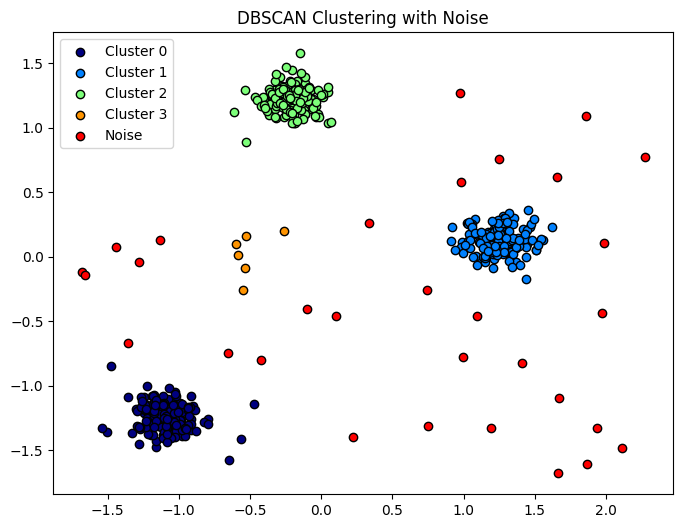

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

#  Generate synthetic data with noise
X, _ = make_blobs(n_samples=500, centers=3, cluster_std=0.6, random_state=42)

# Add random noise
noise = np.random.uniform(low=-10, high=10, size=(50, 2))
X = np.vstack([X, noise])

# Standardize the dataset
X = StandardScaler().fit_transform(X)

# Apply DBSCAN clustering
epsilon = 0.3
minPts = 5

dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
labels = dbscan.fit_predict(X)

# Draw the clustering results
plt.figure(figsize=(8, 6))

# Draw each cluster with a different color
unique_labels = set(labels)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        color = "red"
        label_name = "Noise"
    else:
        label_name = f"Cluster {label}"

    plt.scatter(X[labels == label, 0], X[labels == label, 1], c=[color], label=label_name, edgecolors="k")

plt.title("DBSCAN Clustering with Noise")
plt.legend()
plt.show()


#PCA

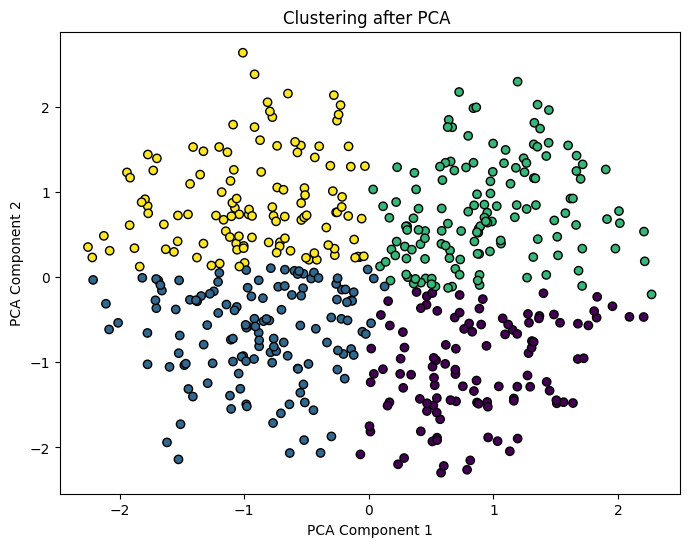

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate synthetic data with 5 dimensions
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# Add random noise features to increase dimensionality
random_noise = np.random.rand(500, 2) * 10
X = np.hstack((X, random_noise))

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_pca)

# Plot clustering results after PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolors="k")
plt.title("Clustering after PCA ")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
